# SVM (Support Vector Machine)

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.svm import SVC

## What is SVM?
- Support Vector Machine (SVM) is a method classifying object by constructing hyperplanes in a multidimensional space
- SVM supports both regression and classification tasks 
- SVM can handle multiple continuous and categorical variables.

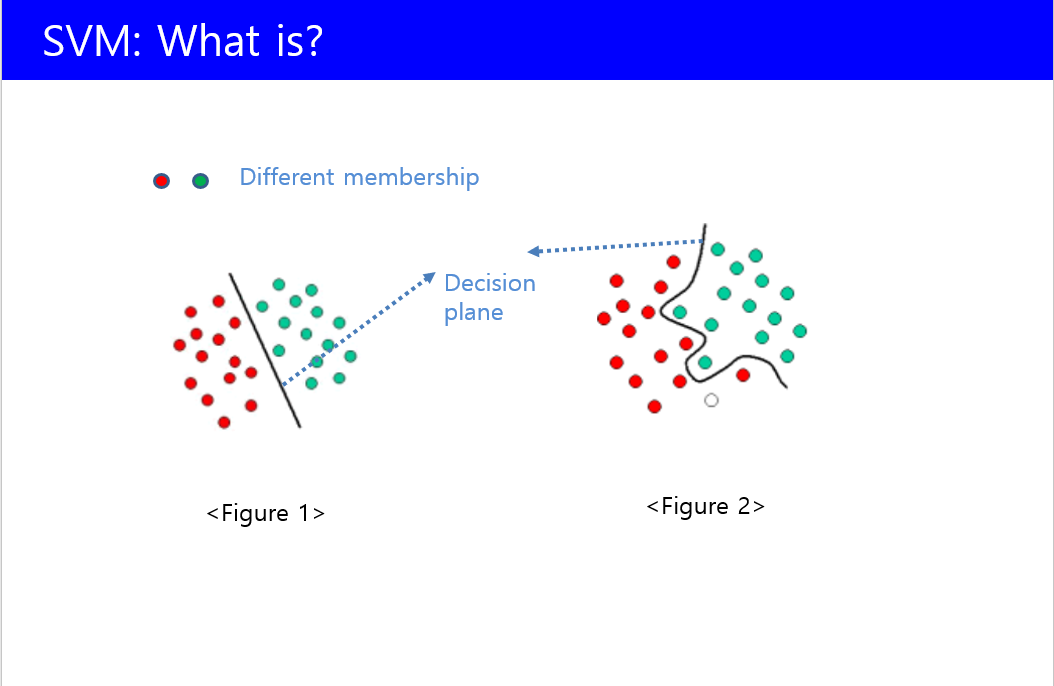

In [35]:
from IPython.display import Image
Image("c:/python/images/SVM0.PNG", width=600, height=150)

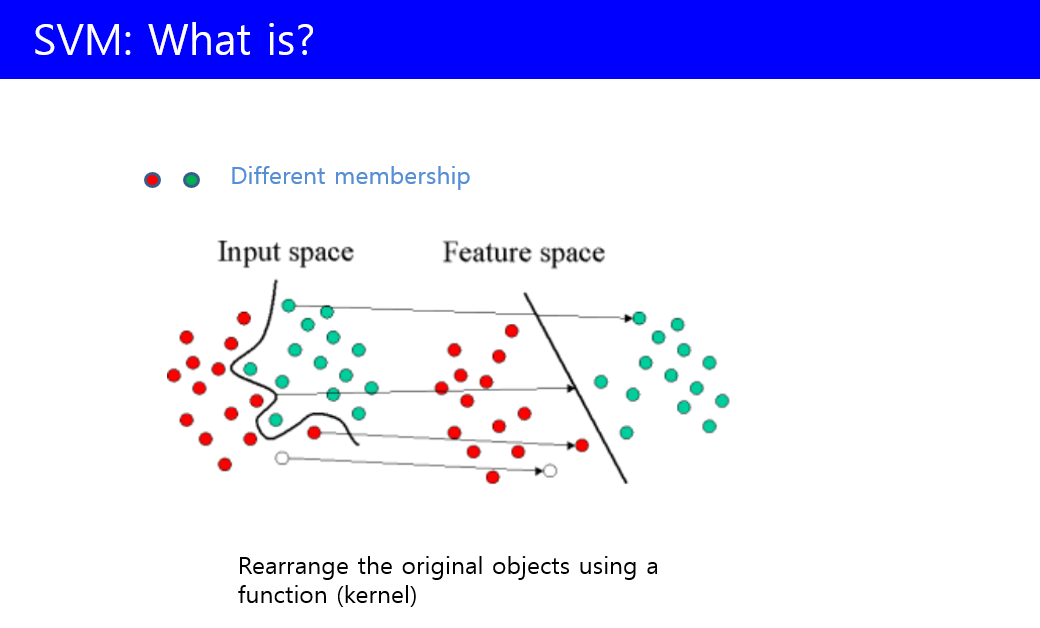

In [36]:
from IPython.display import Image
Image("c:/python/images/SVM02.PNG", width=600, height=150)

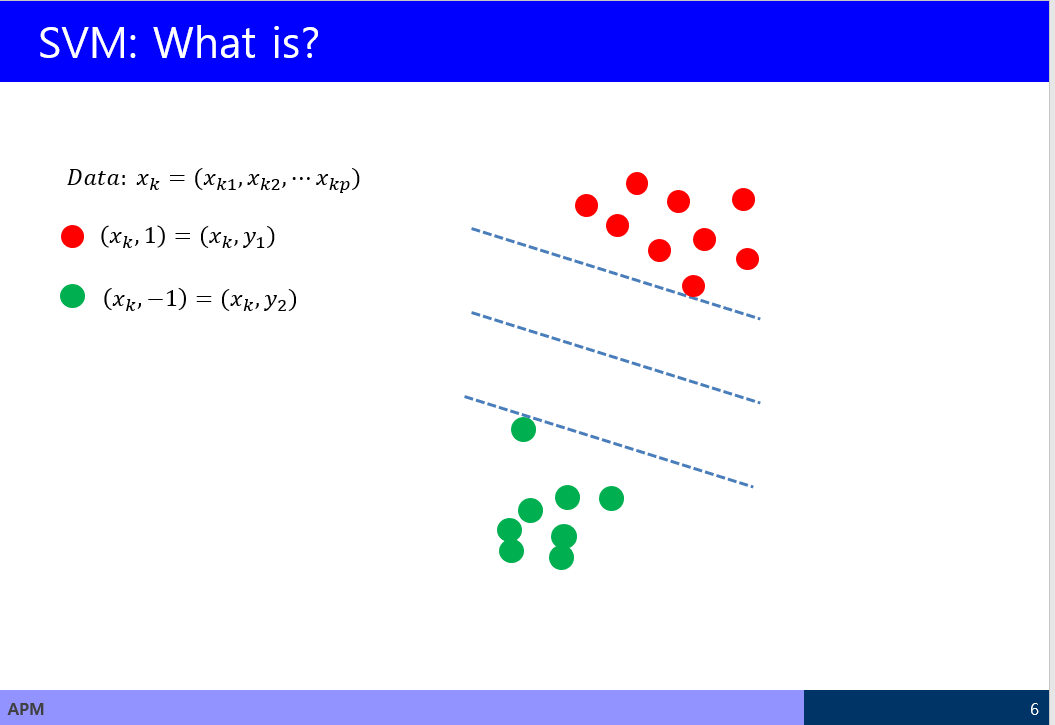

In [37]:
from IPython.display import Image
Image("c:/python/images/SVM1.PNG", width=600, height=150)

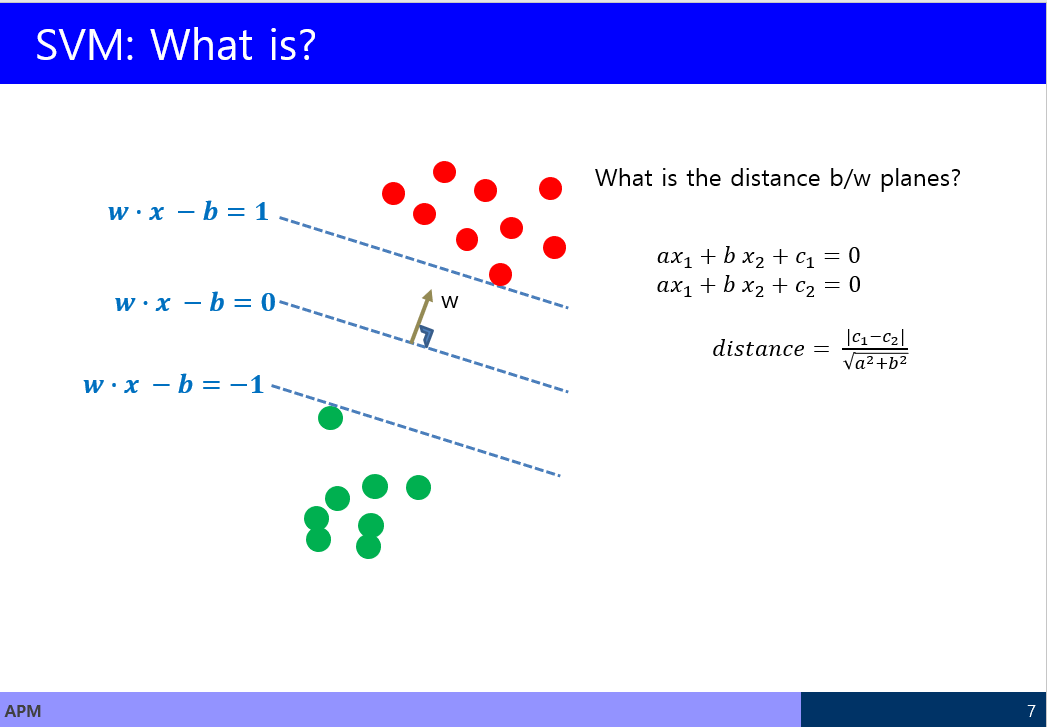

In [38]:
from IPython.display import Image
Image("c:/python/images/SVM2.PNG", width=600, height=150)

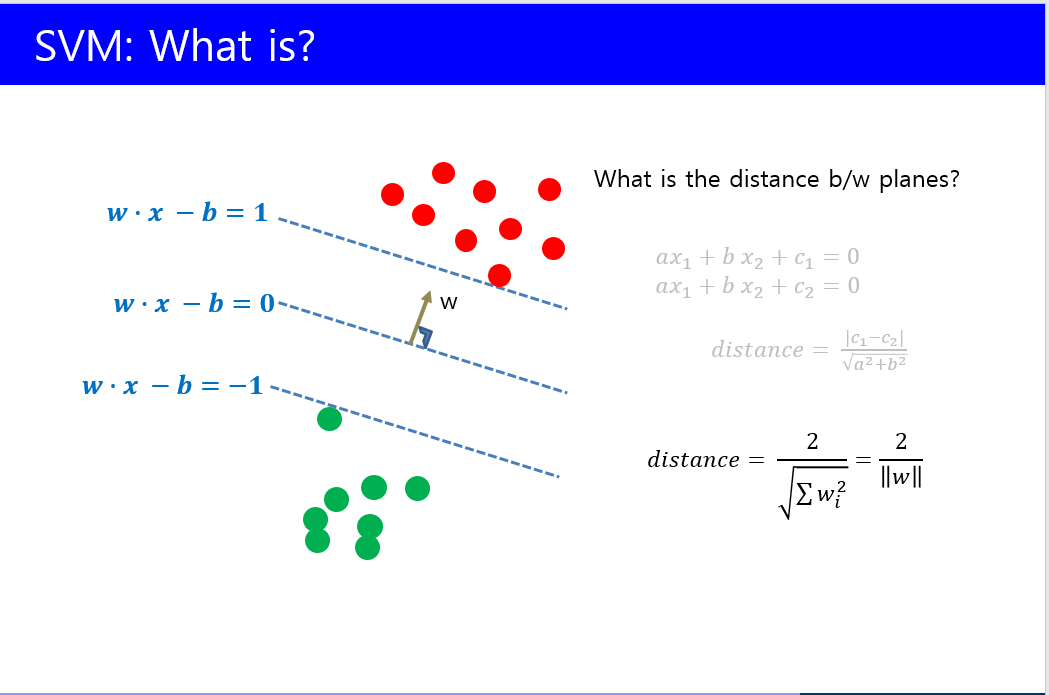

In [39]:
from IPython.display import Image
Image("c:/python/images/SVM3.PNG", width=600, height=150)

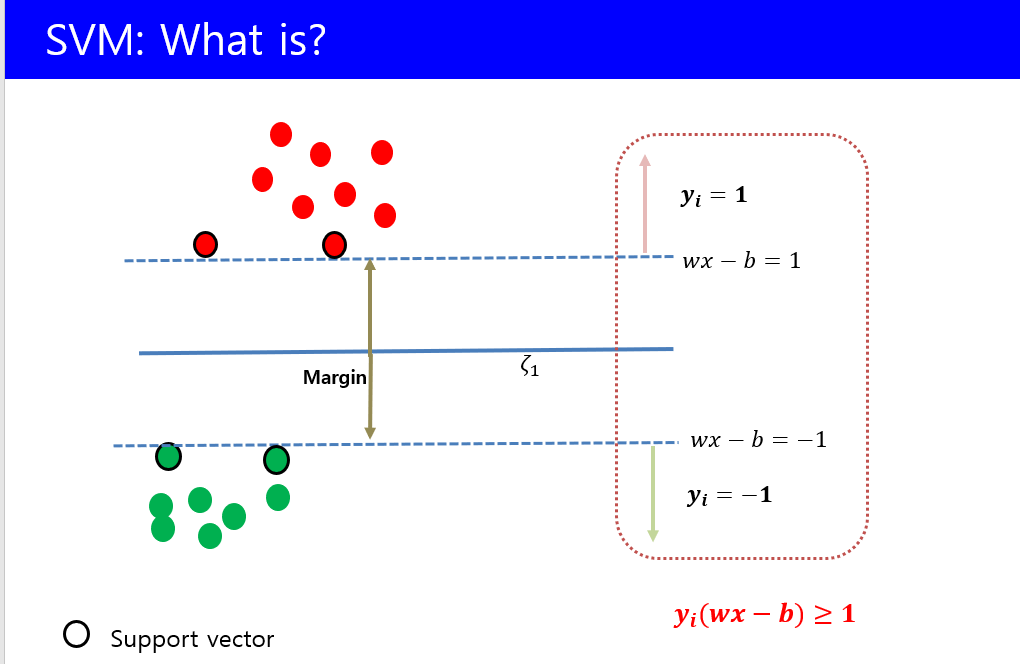

In [45]:
from IPython.display import Image
Image("c:/python/images/SVM11.PNG", width=600, height=150)

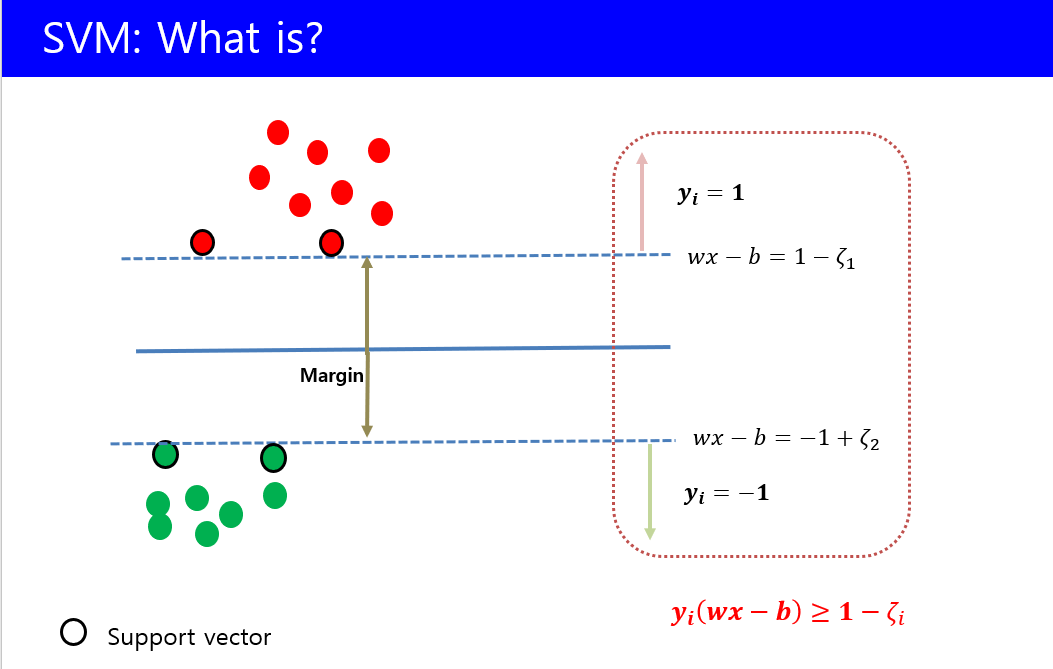

In [46]:
from IPython.display import Image
Image("c:/python/images/SVM22.PNG", width=600, height=150)

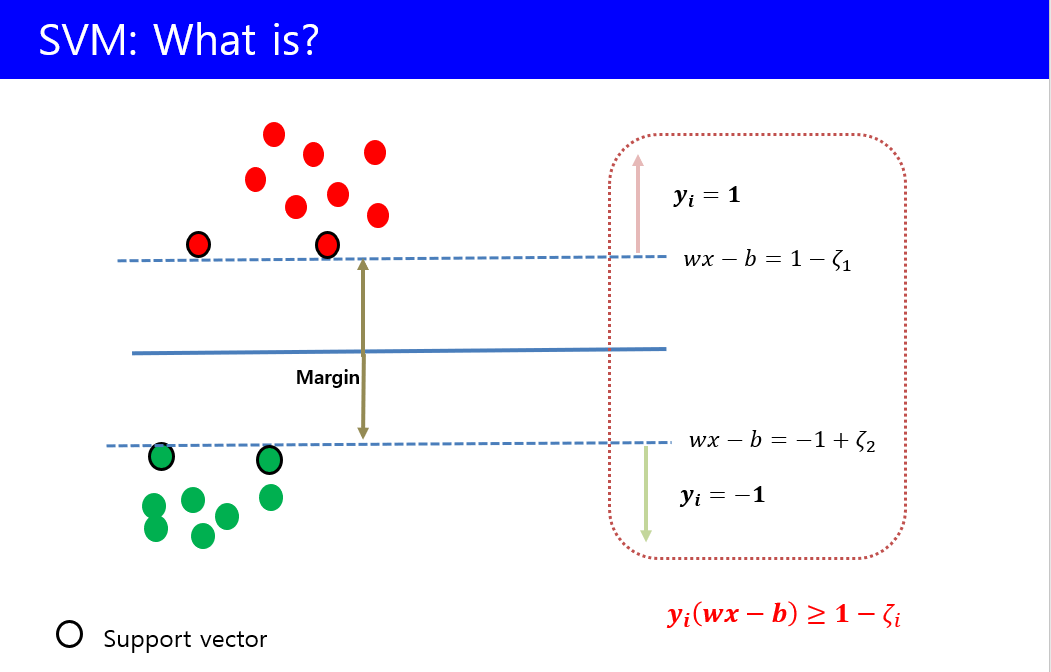

In [47]:
from IPython.display import Image
Image("c:/python/images/SVM33.PNG", width=600, height=150)

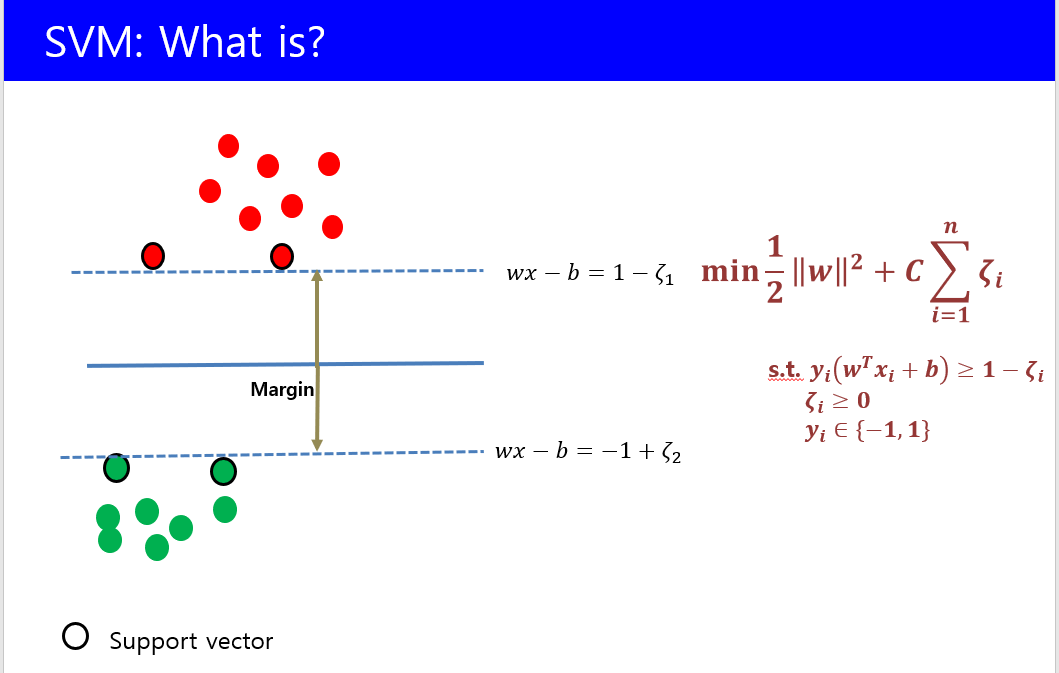

In [48]:
from IPython.display import Image
Image("c:/python/images/SVM44.PNG", width=600, height=150)

**Meaning**

- min$\| w \|^2$ means that maximize the distance b/w two planes 

- $(w^Tx_i +b)\ge 1-\zeta_i$ and $(w^Tx_i +b)\le -1+\zeta_i $ means the minimization procedure prevent data from falling into the margins
  - $\zeta_i$ is a slack variable defining the degree of misallocation

### SVM procedure

1. Get data
2. Optimize rule
\begin{align*}
 \min &\frac{1}{2}||w||^2 + C\sum_{}^{} \zeta_i \\
  &\text{s.t.} \;\;y_i(w^Tx_i +b)\ge 1-\zeta_i \\
 &\;\;\;\;\;\;\  \zeta_i \ge 0 \\
 &\;\;\;\;\;\;\  y_i \in \{-1, 1 \}
\end{align*}

3. Choose kernel and search method for tuning parameters at each kernel
- example: 
  - $C \in (2^{-15}, 2^{-14},\cdots, 2^{3}, )$

4. Choose the best (minimum classification error) parameter value to build the classification model!)

**FOC of optimization (for linear kernel)**

\begin{align*}
\mathcal{L(w, b, \alpha)} = &\frac{1}{2}||w||^2 + C\sum_{}^{} \zeta_i - \sum\alpha_i \big( y_i (wx_i -b)-1 + \zeta_i\big) -\sum \mu_i \zeta_i 
\end{align*}

\begin{align*}
&\frac{\partial \mathcal{L}}{\partial w} = 0  \Rightarrow w = \sum \alpha_i y_i x_i\\
&\frac{\partial \mathcal{L}}{\partial b} = 0  \Rightarrow   \sum \alpha_i y_i =0\\
&\frac{\partial \mathcal{L}}{\partial \zeta_i} = 0  \Rightarrow  C=\mu_i + \alpha_i
\end{align*}

where $\alpha_i, \mu_i$  are Lagrangian multipliers

### Kernel in SVM 

-  Due to the property of the dispersion of data it will be difficult to classify the data with linear plane in reality
-  SVM use the kernel function to transform the original data into a new space with a higher dimension to separate data easily

\begin{align*}
  &K(x_n, x_i) = \phi(x_n) \phi(x_i)\\
  &f(x_i) = \sum_{n=1}^{N} y_n \alpha_n  K(x_n, x_i) + b
\end{align*}
where 
 - $x_n$: support vector data
 - $\alpha_i$ : Largrange multiplier
 - $y_i \in \{-1, 1\}$

- for example in linear kernel (see below) and $y_i = 1$, 

    \begin{align*}
      f(x_i) = \sum_{n=1}^{N} \alpha_n \|x_n- x_i\| +b, \text{where} \|\| \text{:inner product}  \\
    \end{align*}
    
    
  - $a_n, b$  are estimated by the learning algorithm as mentioned above   

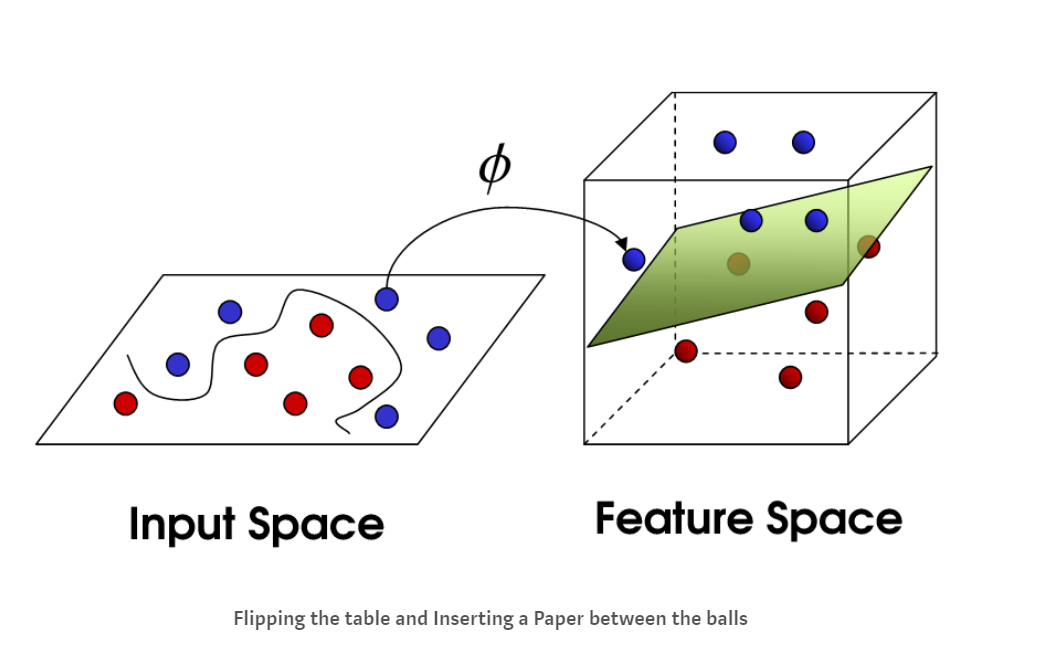

In [49]:
from IPython.display import Image
Image("c:/python/images/SVM5.PNG", width=600, height=150)

from IPython.display import Image
Image("c:/python/images/SVM_Kernel.PNG", width=600, height=150)

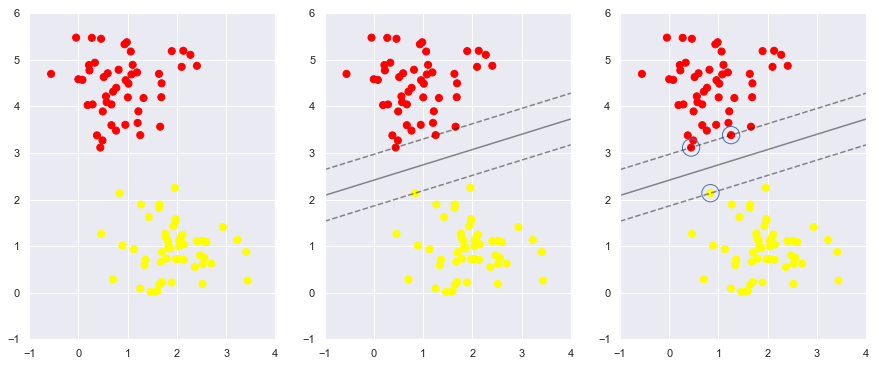

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,6))

plot_svm(N=100, scatter_only=True, ax=ax[0])
plot_svm(N=100, scatter_only=False, ax=ax[1])
plot_svm(N=100, scatter_only=False, plot_support=True, ax=ax[2])

## Why not linear regression?
-  Sometimes generative classification is not unique to separate data into class
    - generative classification:  to find $distribution$ for each class (such as Naive Bayes)
    - descriptive classification: to find line or curve or hyperplane or manifold dividing each class   

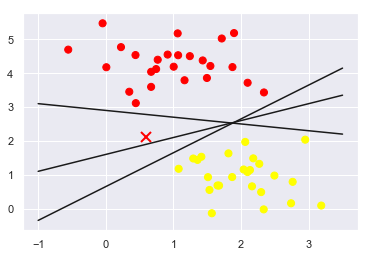

In [9]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

[for 3-d case finding SVM see the following](https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93)

## Model setup

** SVMs are sensitive to the feature scales, it commonly used feature rescaling method such as** `Standardscaler`

In [1]:
# data

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# model

from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

sklearn.svm.classes.SVC

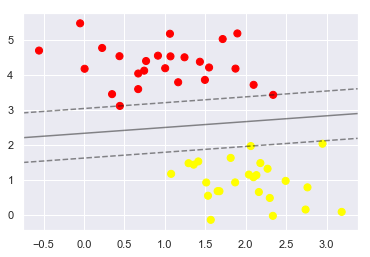

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);SVC

### How to get support vectors?
        model.support_vectors_

In [12]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

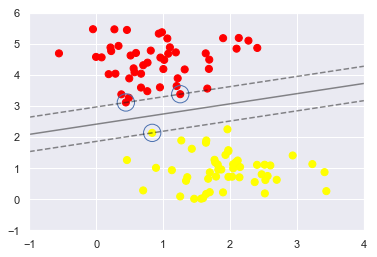

In [13]:
plot_svm(N=100,  plot_support=True)

## SVM: Nonlinear Boundary 

### Example: Linear only?  

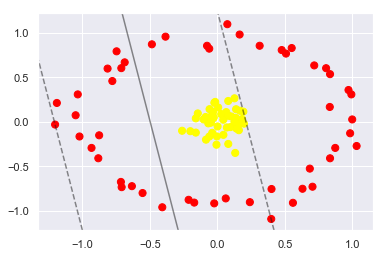

In [16]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [17]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

<IPython.core.display.Javascript object>


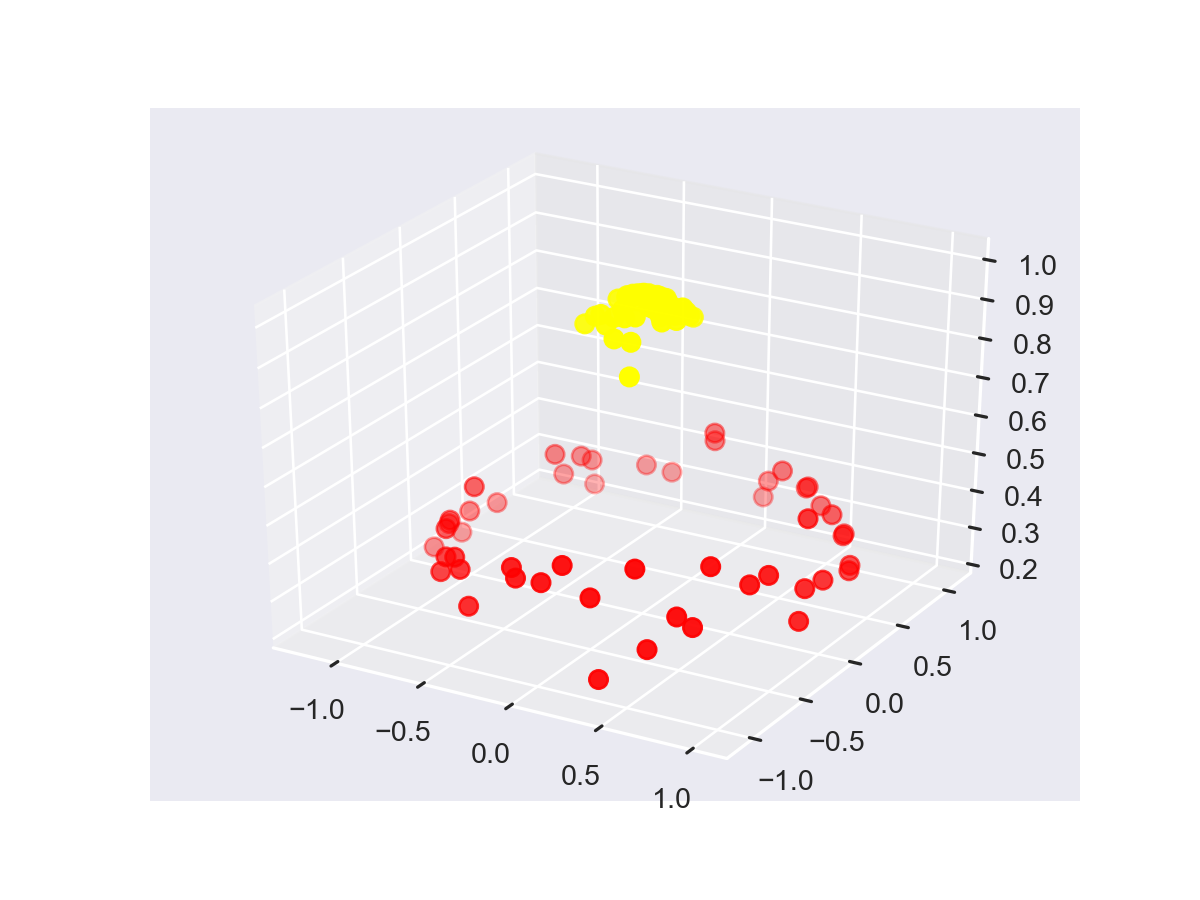

In [19]:
%matplotlib notebook 

r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')


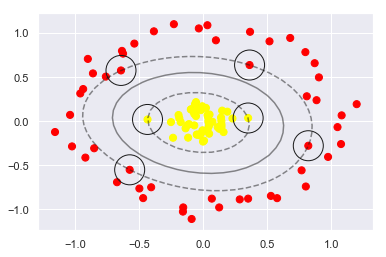

In [20]:
%matplotlib inline 
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=900, lw=1, facecolors='none', edgecolors='k')

## SVM: default kernel called rbf (radial based function)

### what is rbf? 

\begin{equation}
    K(X,X') =e^{-\frac{||X-X'||^2}{2 \sigma^2}},~~~ for~any~two~data~points~~ X, X'
\end{equation}

### parameter for rbf

    Gamma: decision region (spread of kernel). 
            low: region is broad
            high: region is narrow (extreme case: island)
                - with low gamma, points far away from plausible seperation line 
                  are considered in calculation for the seperation line. 
                - Whereas high gamma means the points close to plausible line are considered 
                  in calculation.
    C: penalty for misclassified data. As larger penalty is heavier

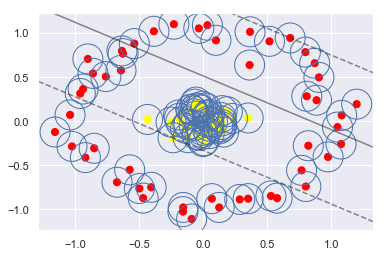

In [21]:
# for lower C

from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1.)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=900, lw=1, facecolors='none', edgecolors='b')

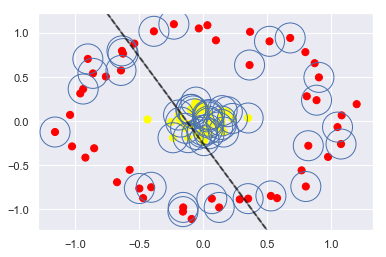

In [22]:
# for higher C: need patience!!!!

from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1E10)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=900, lw=1, facecolors='none', edgecolors='b')

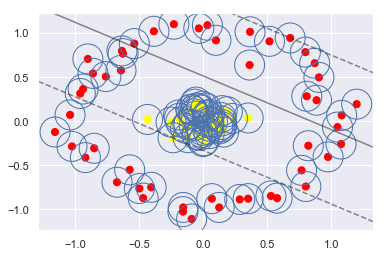

In [23]:
# for lower C and high gamma 

from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1., gamma=100)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=900, lw=1, facecolors='none', edgecolors='b')

##  Tuning: Choose parameters in SVC using various ways, graph or cross-validation

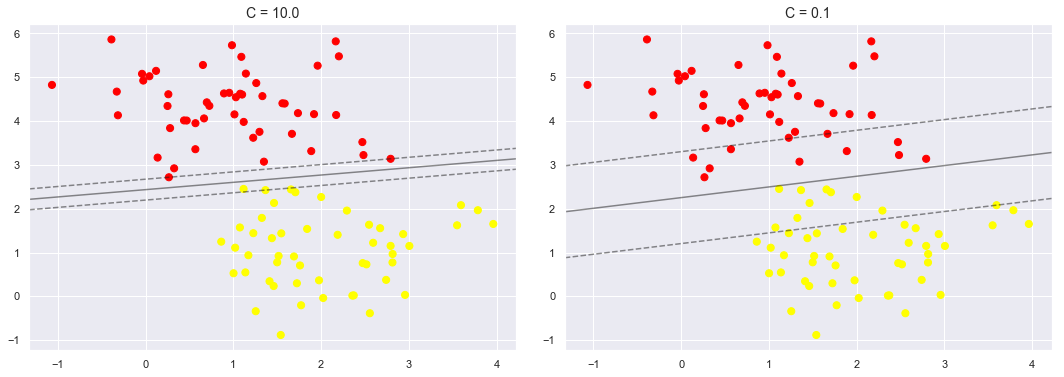

In [24]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [25]:
from IPython.display import FileLink, FileLinks
FileLink("c:/python/ML_Lecture/[ML]SVM.pptx")

c:\python\ML_Lecture\[ML]SVM.pptx

## Gamma and C (penalty)

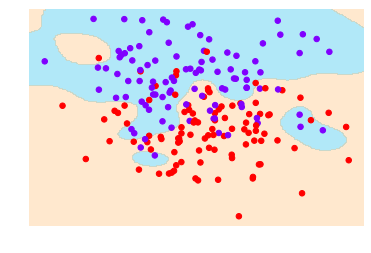

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(200, centers=2, cluster_std=2.6, random_state=0)

from sklearn.svm import SVC

#model = SVC(kernel='rbf', C=10)
model = SVC(kernel='rbf', C=10)
visualize_classifier(model, X, y)

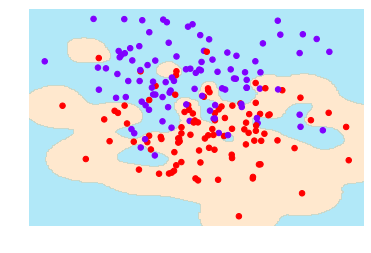

In [27]:
model = SVC(kernel='rbf', gamma=1, C=10)
visualize_classifier(model, X, y)

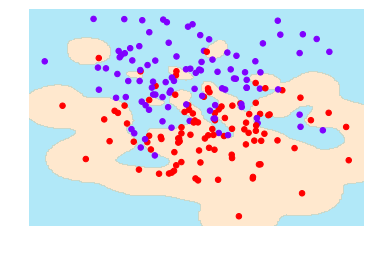

In [43]:
model = SVC(kernel='rbf', gamma=1, C=100)
visualize_classifier(model, X, y)

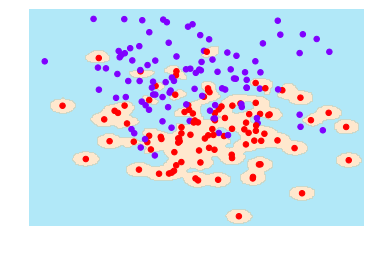

In [28]:
model = SVC(kernel='rbf', gamma=10, C=100)
visualize_classifier(model, X, y)

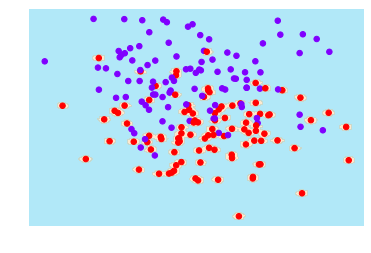

In [29]:
model = SVC(kernel='rbf', gamma=100, C=100)
visualize_classifier(model, X, y)

In [30]:
model.gamma

100

In [6]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)